In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics 
import datetime
import re

from math import sqrt
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### The dataset contains house prices for King County located in the State of Washington, USA. 
The link: https://www.kaggle.com/harlfoxem/housesalesprediction

The dataset contains 21 attributes with 21,613 observations. 

In [2]:
df_og = pd.read_csv("/Users/assanakbota/Desktop/kc_house_data.csv")

In [3]:
df_og.shape

(21613, 21)

In [4]:
df_og.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# EDA

### NA Analysis

In [5]:
df_og = df_og.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df_og = df_og.replace("", np.nan)

In [6]:
na_var_list = df_og.isna().sum()/df_og.shape[0]
na_var_list

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

#### No NA values were found. 

In [7]:
df_og.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We notice that around 75% of observations within variable "yr_renovated" contains zeroes. 
This indicates that the house has not been renovated at all since its inception. 
We need to impute values of zero within this column with corresponding values within column "yr_built". 
This would indicate that the last renovation happened when the house was first built. 

#### Dropping column "id", creating new columns for date sold, month sold, day sold and dropping "date".  Reformatting column "yr_renovated". 

In [8]:
df = df_og.drop(columns = ["id"])

df['year_sold'] = df['date'].str[:4]
df['month_sold'] = df['date'].str[4:6]
df['day_sold'] = df['date'].str[6:8]

df.loc[df.yr_renovated == 0, 'yr_renovated'] = df["yr_built"]
df = df.drop(columns = ["date"])

### Creating functions for future plotting. 

In [9]:
def box_plotter(data, x_axis_name, title):
    plt.figure(figsize=(3, 7))   
    plt.title(str(title))
    plt.boxplot(data)
    plt.xlabel(str(x_axis_name))
    plt.grid(axis='y', alpha=0)

In [10]:
def hist_plotter(data, x_axis_name, bins, title):
    plt.figure(figsize=(10, 5))   
    plt.title(str(title))
    data.plot.hist(grid=True, bins=bins, 
                   color='#607c8e')
    plt.xlabel(str(x_axis_name))
    plt.grid(axis='y', alpha=0)

In [11]:
def scatter_plotter(x, y, x_axis_name, y_axis_name, title):
    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, alpha=0.5)
    plt.title(str(title))
    plt.xlabel(str(x_axis_name))
    plt.ylabel(str(y_axis_name))
    plt.show()

In [12]:
def line_plotter(x, y, x_axis_name, y_axis_name, title):
    plt.figure(figsize=(10, 7))
    plt.plot(x, y)
    plt.title(str(title))
    plt.xlabel(str(x_axis_name))
    plt.ylabel(str(y_axis_name))
    plt.show()

### Outlier Analysis

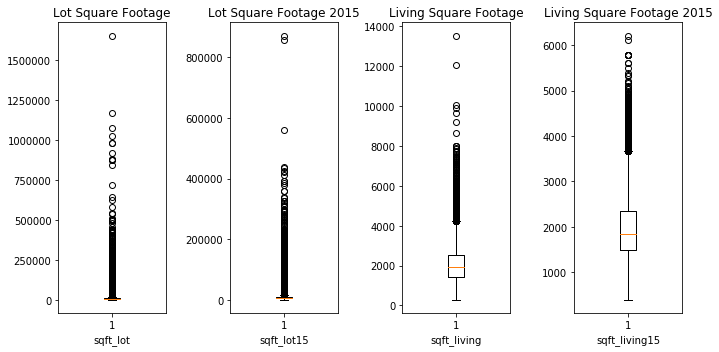

In [13]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
 
    
plt.title("Lot Square Footage")
plt.boxplot(df["sqft_lot"])
plt.xlabel('sqft_lot')

plt.subplot(1, 4, 2)

plt.title("Lot Square Footage 2015")
plt.boxplot(df["sqft_lot15"])
plt.xlabel('sqft_lot15')

plt.subplot(1, 4, 3)
plt.title("Living Square Footage")
plt.boxplot(df["sqft_living"])
plt.xlabel('sqft_living')

plt.subplot(1, 4, 4)
plt.title("Living Square Footage 2015")
plt.boxplot(df["sqft_living15"])
plt.xlabel('sqft_living15')


plt.tight_layout()
plt.show()

#### Given the total area of King County being 64,315,469 sq feet, we are observing a lot of enormous values for sqft_lot. Let's investigate further by creating a new column "sqft_lot_change" that indicates a percentage change in lot square footage between years 2015 and 2014. 


In [14]:
df["sqft_lot_change"] = (df["sqft_lot"] - df["sqft_lot15"])/df["sqft_lot15"]

df["sqft_living_change"] = (df["sqft_living"] - df["sqft_living15"])/df["sqft_living15"]

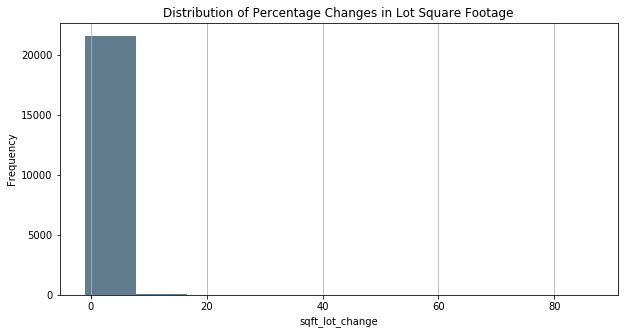

In [15]:
 hist_plotter(df["sqft_lot_change"], "sqft_lot_change", 10, 
              "Distribution of Percentage Changes in Lot Square Footage")

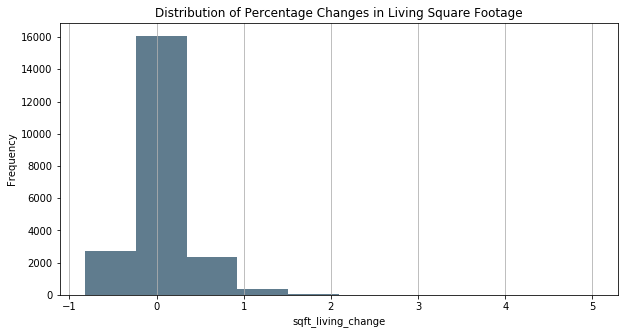

In [16]:
 hist_plotter(df["sqft_living_change"], "sqft_living_change", 10, 
              "Distribution of Percentage Changes in Living Square Footage")

From the graph above, we notice that percentage change in lot square footage is clustered around 0 with the presence of enormous positive percentage changes as well as percentage decreases. These types of changes are unrealistic given that there is no mention of partial lot sales nor purchases. The lot area should not be affected by renovations, which indeed do increase/decrease "sqft_living". 

#### Around 4% of our observations have their lot square footage increase or decrease by 100% .

In [17]:
(len(df[df["sqft_lot_change"] <= -1 ])/df.shape[0]) + (len(df[df["sqft_lot_change"] >= 1 ])/df.shape[0])

0.03747744413084717

#### Around 1.7% of our observations have their lot square footage increase or decrease by 100%.

In [18]:
(len(df[df["sqft_living_change"] <= -1 ])/df.shape[0]) + (len(df[df["sqft_living_change"] >= 1])/df.shape[0])

0.01730440012955166

#### Let's look into the distribution of initial living square footages for observations with a percentage increse/decrease in living area of more than or equal to 100%.

Text(0.5,0,'sqft_living15')

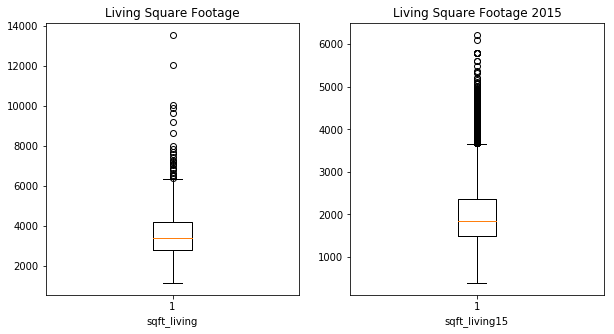

In [19]:
df_living_change = df[(df["sqft_living_change"] <= -1 ) | (df["sqft_living_change"] >= 1 )]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
 
    
plt.title("Living Square Footage")
plt.boxplot(df_living_change["sqft_living"])
plt.xlabel('sqft_living')

plt.subplot(1, 2, 2)

plt.title("Living Square Footage 2015")
plt.boxplot(df["sqft_living15"])
plt.xlabel('sqft_living15')


The initial values for living area were small to begin with, and the scale of changes in living area appear to be reasonable. 

#### Total initial lot square footage being larger/smaller  by more than 100% of the area documented in 2015 seems unreasonable. 

These values appear to be outliers or data entry errors.
Given that these cases represent a very small proportion of our data, let's impute these outliers by corresponding values within column "sqft_lot15". 

In [20]:
df.loc[(df.sqft_lot_change >= 1) | (df.sqft_lot_change <= -1) , 'sqft_lot'] = df["sqft_lot15"]

#### Changing variables "waterfront" and "zipcode" to categorical variables and "year_sold",  "month_sold", "day_sold" into numeric.

In [21]:
df = df.astype({"waterfront": object, "zipcode": object, "year_sold": int, "month_sold": int, "day_sold": int})

Dropping newly created columns from our dataset. 

In [22]:
df = df.drop(columns = ["sqft_lot_change", "sqft_living_change"])

# Visual Exploration

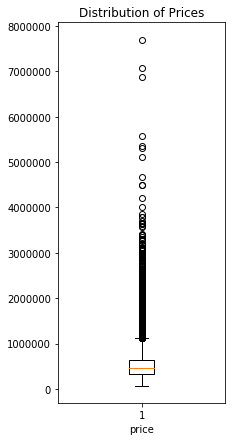

In [23]:
box_plotter(df["price"], "price", "Distribution of Prices")

Text(0.5,1,'Correlation with "price"')

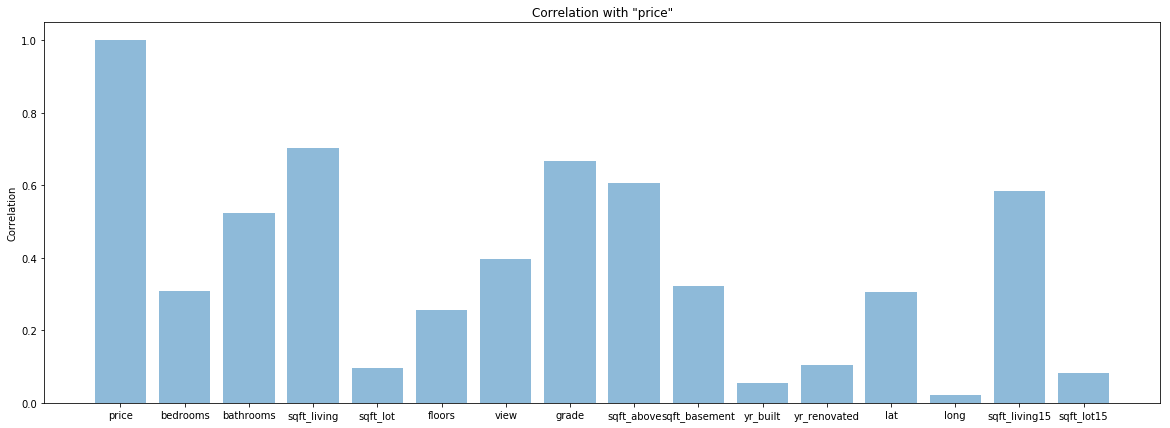

In [24]:
corr = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view',  'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15']].corr()


plt.figure(figsize=(20, 7))
plt.bar(corr["price"].keys(), corr["price"].values, align='center', alpha=0.5)
plt.ylabel('Correlation')
plt.title('Correlation with "price"')


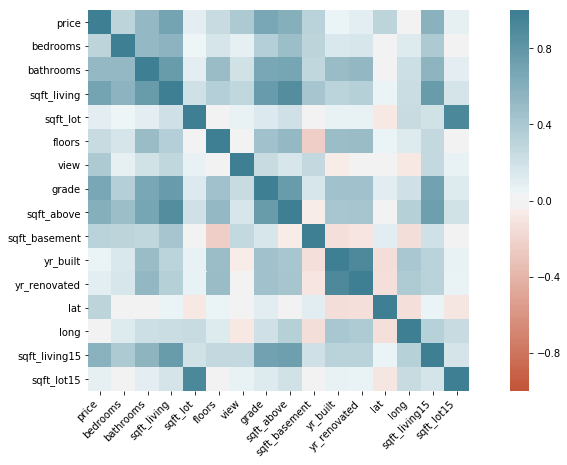

In [25]:
plt.figure(figsize=(15, 7))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

## For graphs below, please make sure to click on them to see a zoomed, user-friendly version. 

Text(0.5,1,'Distribution of Prices by Zipcode')

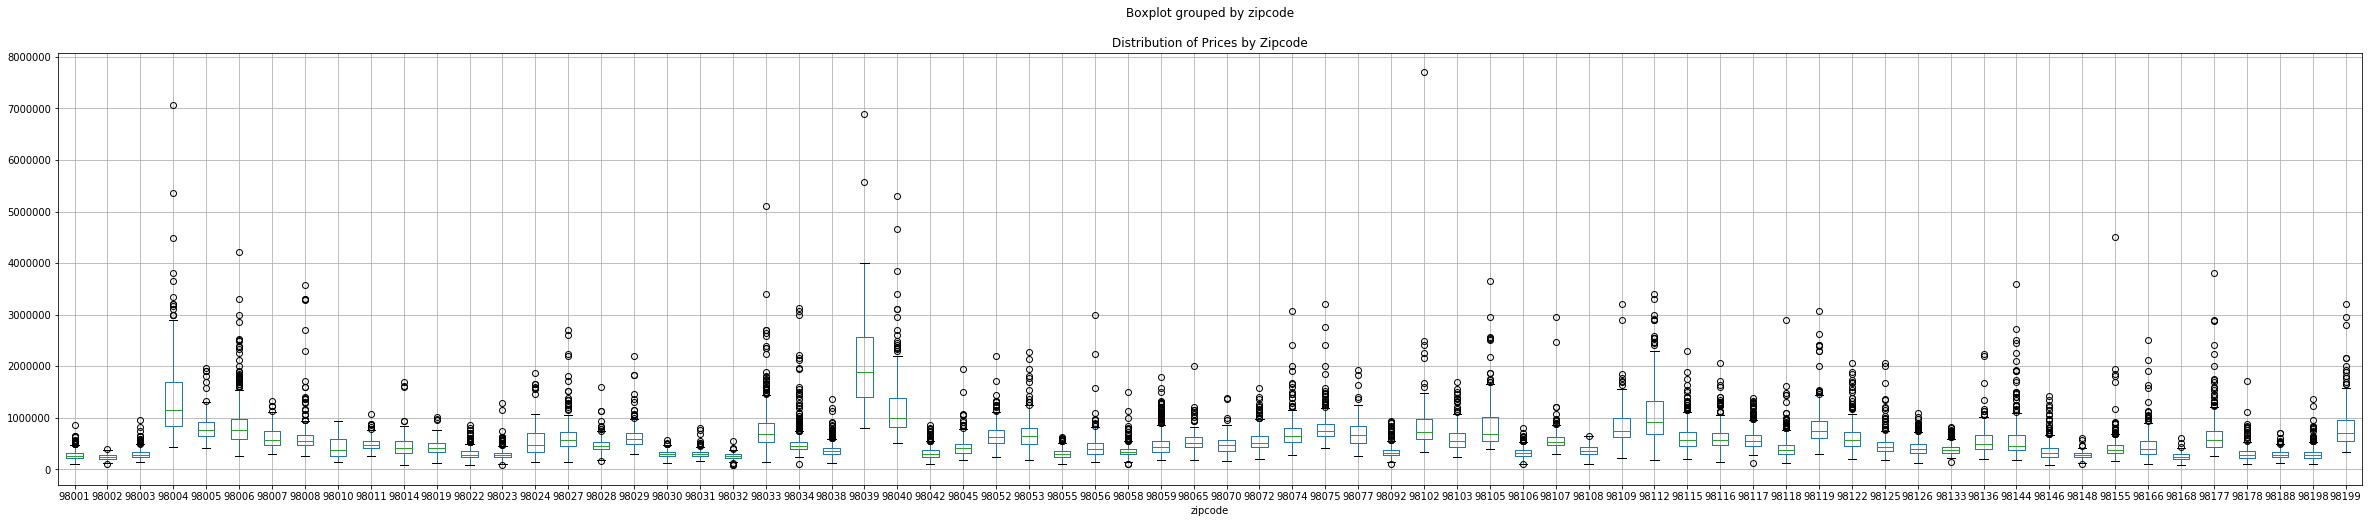

In [26]:
fig, ax = plt.subplots(figsize=(40,8))
df.boxplot(column=['price'], by='zipcode', ax=ax)
plt.title("Distribution of Prices by Zipcode")

Text(0.5,1,'Distribution of Prices by Grade')

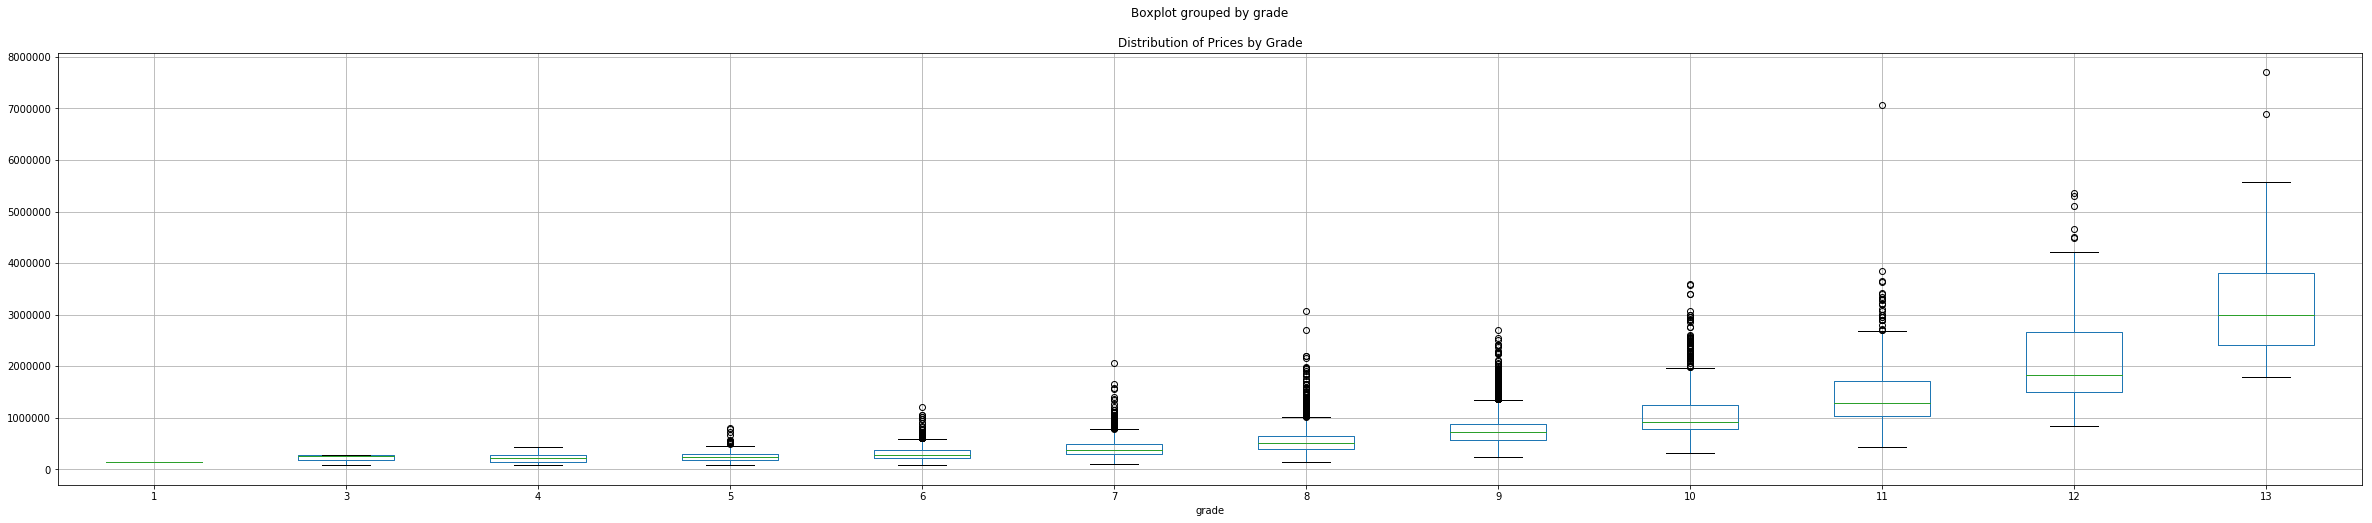

In [27]:
fig, ax = plt.subplots(figsize=(40,8))
df.boxplot(column=['price'], by='grade', ax=ax)
plt.title("Distribution of Prices by Grade")


Text(0.5,1,'Distribution of Grades by Zipcode')

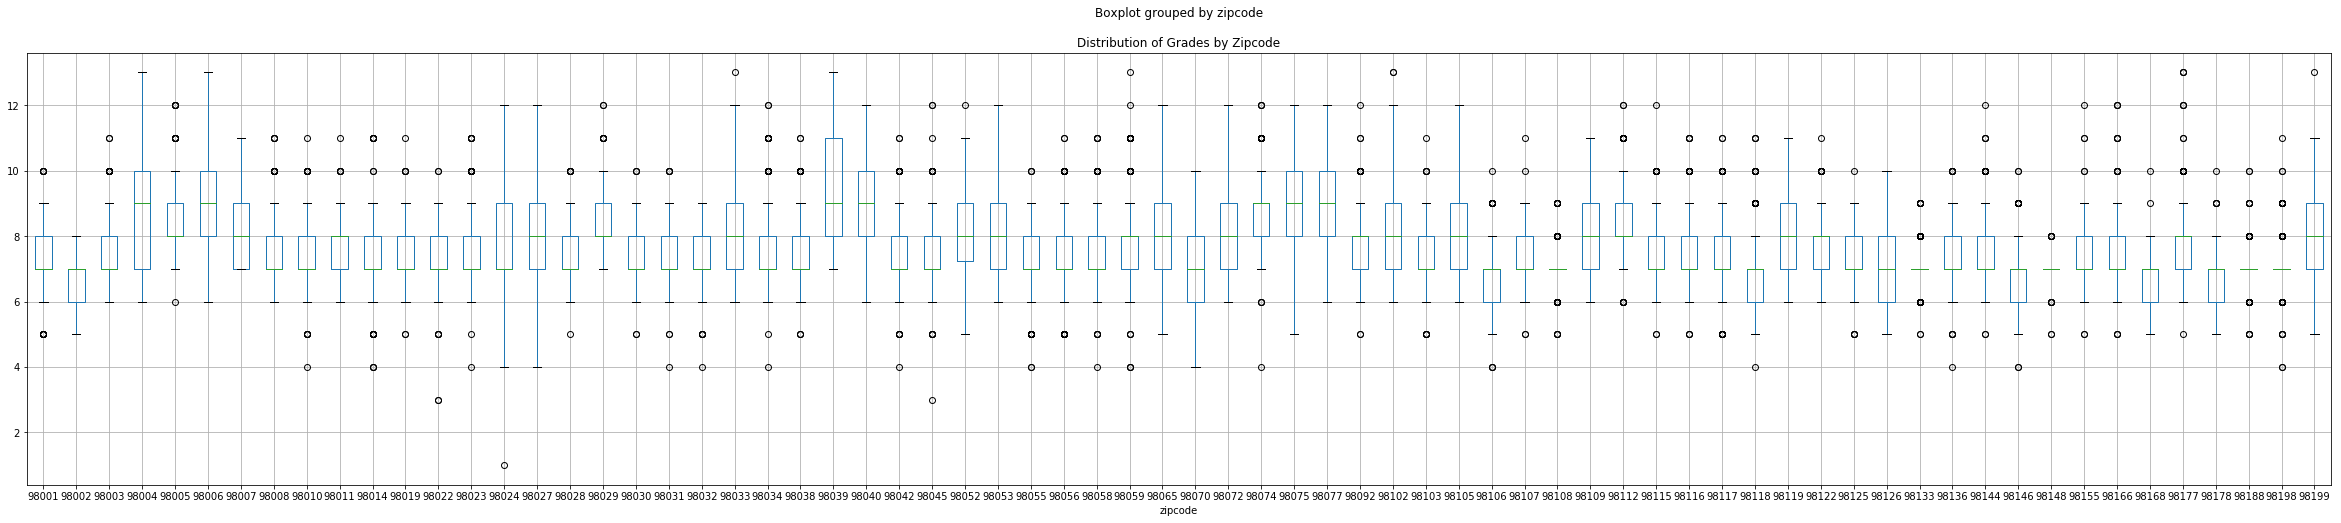

In [28]:
fig, ax = plt.subplots(figsize=(40,8))
df.boxplot(column=['grade'], by='zipcode', ax=ax)
plt.title("Distribution of Grades by Zipcode")


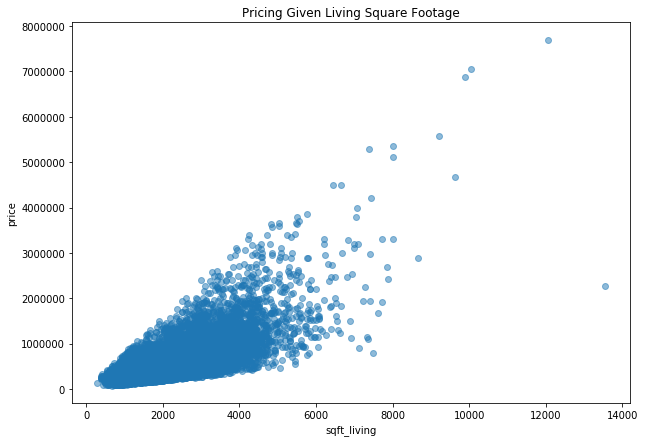

In [29]:
scatter_plotter(df["sqft_living"], df["price"], "sqft_living", "price", "Pricing Given Living Square Footage")

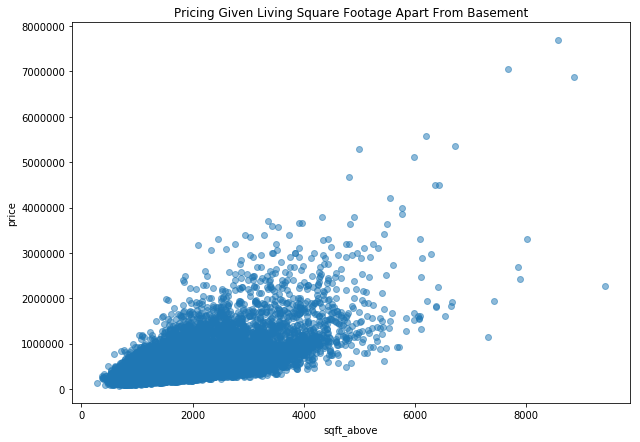

In [30]:
scatter_plotter(df["sqft_above"], df["price"], "sqft_above", "price", "Pricing Given Living Square Footage Apart From Basement")

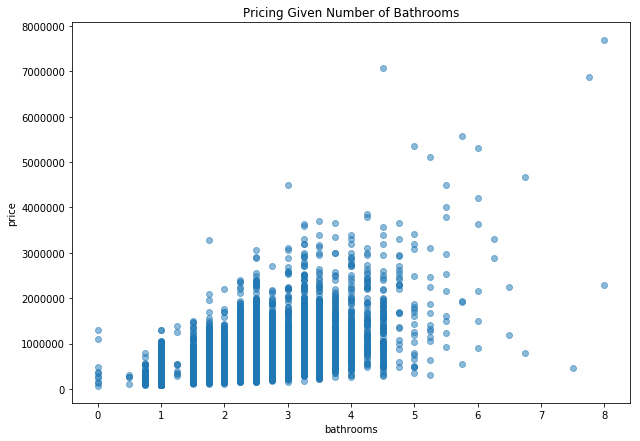

In [31]:
scatter_plotter(df["bathrooms"], df["price"], "bathrooms", "price", "Pricing Given Number of Bathrooms")

# Further Data Preprocessing

#### Creating dummies for categorical variables. 

In [32]:
df_final = pd.get_dummies(df, drop_first = True)

In [33]:
df_final.shape

(21613, 90)

#### Shuffling the data, normalizing it and dividing it into training and test sets (70/30). 

In [34]:
df_shuffle = shuffle(df_final, random_state = 0)
X = df_shuffle.loc[:, df_shuffle.columns != 'price']
Y = df_shuffle['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


scaler = StandardScaler().fit(X_train)
x_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X.columns.values)
x_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X.columns.values)

# Linear Regression

In [35]:
val = cross_val_score(LinearRegression(), x_train_scaled, y_train, cv = 10, scoring= 'neg_mean_squared_error')
lin_reg_cv_rmse = np.sqrt(np.absolute(val)).mean()

In [36]:
print("Cross-validation RMSE: " + str(lin_reg_cv_rmse))

Cross-validation RMSE: 157395.28588551146


In [43]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
lr_features = pd.concat([pd.Series(X.columns.values), pd.Series(lr.coef_)], axis = 1)
lr_features.columns = ["feature", "coefficient"]

# LASSO

#### Optimal lambda is chosen through cross-validation. 

In [37]:
lasso_score_list = {}

for a in [18,20, 25, 30, 50, 100, 1000]:
        val = cross_val_score(Lasso(alpha=a, tol = 0.01), x_train_scaled, y_train, cv = 10, scoring= 'neg_mean_squared_error')
        lasso_score_list[a] = np.sqrt(np.absolute(val)).mean()



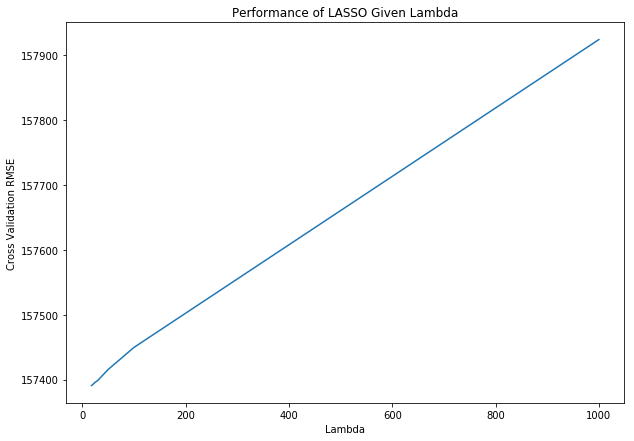

In [76]:
line_plotter(lasso_score_list.keys(), lasso_score_list.values(), "Lambda", "Cross Validation RMSE", "Performance of LASSO Given Lambda")


In [75]:
print("Optimal Lambda: " + str(min(lasso_score_list, key=lasso_score_list.get)))
print("Minimal RMSE Achieved: " + str(lasso_score_list[min(lasso_score_list, key=lasso_score_list.get)]))

Optimal Lambda: 18
Minimal RMSE Achieved: 157390.85619399117


#### Best cross-validation RMSE is achieved with lambda of 18. No variables were dropped. Compared to Linear Regression, all variable coefficients experienced a drop. 

In [40]:
lasso_reg = Lasso(alpha = 18, tol = 0.01)
lasso_reg.fit(x_train_scaled, y_train)

lasso_features = pd.concat([pd.Series(X.columns.values), pd.Series(lasso_reg.coef_)], axis = 1)
lasso_features.columns = ["feature", "coefficient"]
lasso_features[lasso_features["coefficient"] == 0]

,feature,coefficient


In [48]:
coef_dif = lr_features["coefficient"] - lasso_features["coefficient"] 
coef_dif_df = pd.concat([pd.Series(X.columns.values), pd.Series(coef_dif)], axis = 1)
coef_dif_df.columns = ["feature", "coefficient difference"]
len(coef_dif_df[coef_dif_df["coefficient difference"] != 0])

89

# Ridge Regression

#### Optimal lambda is chosen through cross-validation. 

In [49]:
r_score_list = {}

for a in [0.01, 0.1, 1, 2, 3,4, 5, 6, 7,8, 9, 10, 25, 50, 100]:
        val = cross_val_score(Ridge(alpha=a), x_train_scaled, y_train, cv = 10, scoring= 'neg_mean_squared_error')
        r_score_list[a] = np.sqrt(np.absolute(val)).mean()

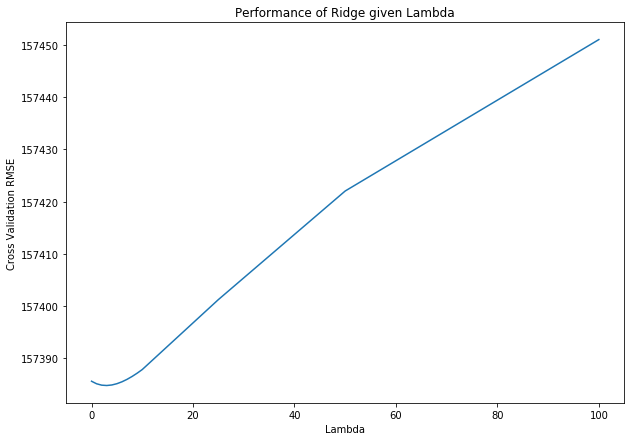

In [71]:
line_plotter(r_score_list.keys(), r_score_list.values(), "Lambda", "Cross Validation RMSE", 
             "Performance of Ridge given Lambda" )

In [73]:
print("Optimal Lambda: " + str(min(r_score_list, key=r_score_list.get)))
print("Minimal RMSE Achieved: " + str(r_score_list[min(r_score_list, key=r_score_list.get)]))

Optimal Lambda: 3
Minimal RMSE Achieved: 157384.71759486364


# Kernel Ridge Regression

#### Optimal lamba is chosen through cross-validation. 

In [53]:
ridge_score_list = {}

for a in [0.001, 0.01, 0.1, 1, 2, 5, 7, 10, 25, 50, 100]:
        val = cross_val_score(KernelRidge(alpha = a, kernel='poly', degree=2), x_train_scaled, y_train, cv = 10, scoring= 'neg_mean_squared_error')
        ridge_score_list[a] = np.sqrt(np.absolute(val)).mean()


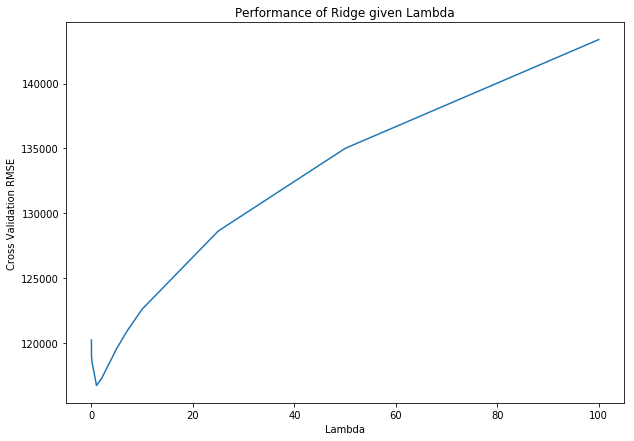

In [72]:
line_plotter(ridge_score_list.keys(), ridge_score_list.values(), "Lambda", "Cross Validation RMSE", 
             "Performance of Ridge given Lambda" )

In [74]:
print("Optimal Lambda: " + str(min(ridge_score_list, key=ridge_score_list.get)))
print("Minimal RMSE Achieved: " + str(ridge_score_list[min(ridge_score_list, key=ridge_score_list.get)]))

Optimal Lambda: 1
Minimal RMSE Achieved: 116734.11777234022


### Asessing the performance of the model on the test.

In [56]:
kernel_ridge = KernelRidge(alpha=1.0, kernel='poly', degree=2)
kernel_ridge.fit(x_train_scaled, y_train)

KernelRidge(alpha=1.0, coef0=1, degree=2, gamma=None, kernel='poly',
      kernel_params=None)

In [57]:
kernel_ridge_rms = sqrt(mean_squared_error(y_test, kernel_ridge.predict(x_test_scaled)))
kernel_ridge_rms

120820.40937923547

In [58]:
residuals = y_test - kernel_ridge.predict(x_test_scaled)

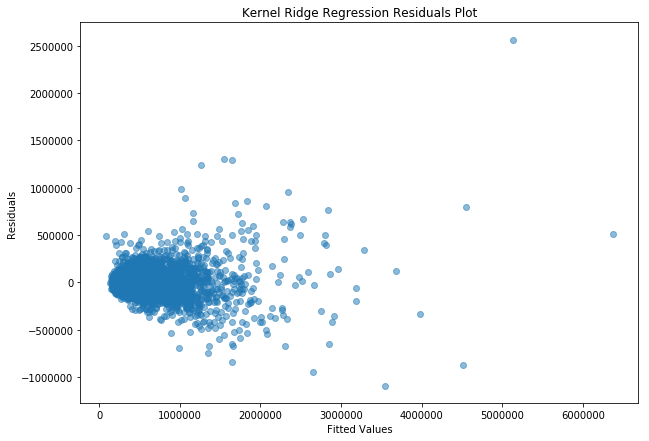

In [59]:
scatter_plotter(kernel_ridge.predict(x_test_scaled), residuals, "Fitted Values", "Residuals", "Kernel Ridge Regression Residuals Plot")

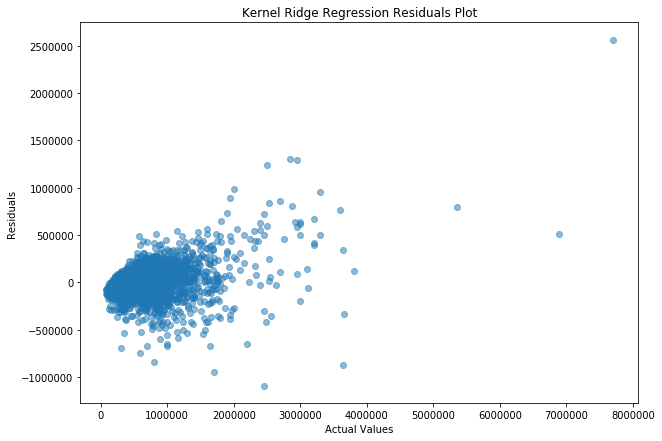

In [60]:
scatter_plotter(y_test, residuals, "Actual Values", "Residuals", "Kernel Ridge Regression Residuals Plot")

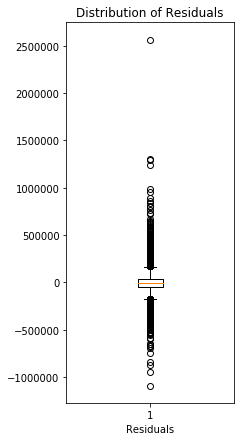

In [61]:
box_plotter(residuals, "Residuals", "Distribution of Residuals")

# PCA

Let's reduce dimensionality of our dataset by performing Principal Component Analysis with the number of components that explaines 90% of variability. 

In [62]:
pca = PCA(0.9)
pca.fit(x_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

#### Dimensionality was reduced from 90 to 69 variables. 

In [63]:
pca.n_components_

69

Transforming the data with PCA. 

In [64]:
train_x_pca = pca.transform(x_train_scaled)
test_x_pca = pca.transform(x_test_scaled)

# KNN

#### Optimal k number of neighbors is chosen through cross-validation. 

In [65]:
knn_scores = {}
for k in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50, 75, 100]:
    val = cross_val_score(KNeighborsRegressor(n_neighbors=k), 
                                    train_x_pca, y_train, cv=10, scoring= 'neg_mean_squared_error')
    
    knn_scores[k] = np.sqrt(np.absolute(val)).mean()
    

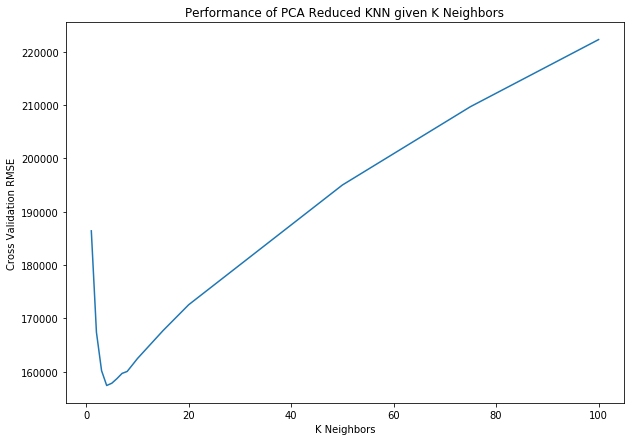

In [66]:
line_plotter(knn_scores.keys(), knn_scores.values(), "K Neighbors", "Cross Validation RMSE", "Performance of PCA Reduced KNN given K Neighbors" )

In [67]:
print("Optimal K: " + str(min(knn_scores, key=knn_scores.get)))
print("Minimal RMSE Achieved: " + str(knn_scores[min(knn_scores, key=knn_scores.get)]))

Optimal K: 4
Minimal RMSE Achieved: 157402.43788459455


# Random Forest 

#### Maximum number of features considered at each split is chosen through cross-validation. 

In [68]:
tree_scores = {}
for i in range(1, pca.n_components_):
    val = cross_val_score(RandomForestRegressor(random_state=0, max_features = i), 
                                train_x_pca, y_train, cv=10, scoring= 'neg_mean_squared_error')

    tree_scores[i] = np.sqrt(np.absolute(val)).mean()


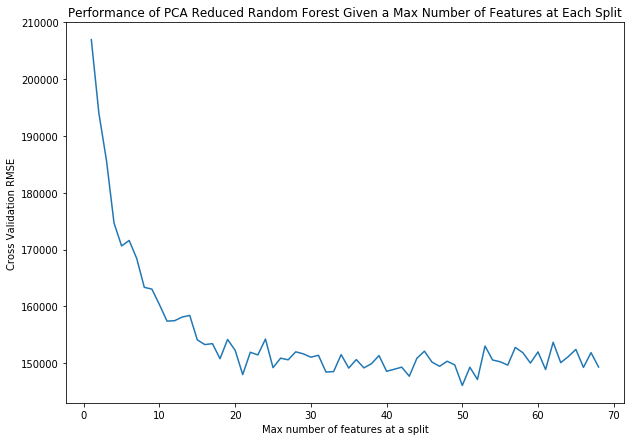

In [69]:
line_plotter(tree_scores.keys(), tree_scores.values(), "Max number of features at a split", 
             "Cross Validation RMSE", "Performance of PCA Reduced Random Forest Given a Max Number of Features at Each Split"  )

In [70]:
print("Maximum Number of Feature Considered at Each Split: " + str(min(tree_scores, key=tree_scores.get)))
print("Minimal RMSE Achieved: " + str(tree_scores[min(tree_scores, key=tree_scores.get)]))

Maximum Number of Feature Considered at Each Split: 50
Minimal RMSE Achieved: 146071.50852265814
